In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t', index_col=0).dropna(0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16257 entries, ENSG00000000003.14 to ENSG00000283071.1
Data columns (total 41 columns):
geneSymbol          16257 non-null object
LC001-normal-RPF    16257 non-null int64
LC001-tumor-RPF     16257 non-null int64
LC001-normal-RNA    16257 non-null int64
LC001-tumor-RNA     16257 non-null int64
LC033-normal-RPF    16257 non-null int64
LC033-tumor-RPF     16257 non-null int64
LC033-normal-RNA    16257 non-null int64
LC033-tumor-RNA     16257 non-null int64
LC034-normal-RPF    16257 non-null int64
LC034-tumor-RPF     16257 non-null int64
LC034-normal-RNA    16257 non-null int64
LC034-tumor-RNA     16257 non-null int64
LC501-normal-RPF    16257 non-null int64
LC501-tumor-RPF     16257 non-null int64
LC501-normal-RNA    16257 non-null int64
LC501-tumor-RNA     16257 non-null int64
LC502-normal-RPF    16257 non-null int64
LC502-tumor-RPF     16257 non-null int64
LC502-normal-RNA    16257 non-null int64
LC502-tumor-RNA     16257 non-null int64
LC505

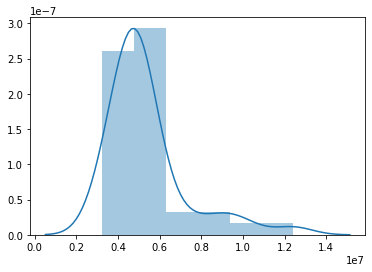

In [4]:
cols = [x for x in data.columns if 'LC' in x]
sns.distplot(data[cols].sum(), bins=1+int(np.log2(len(cols))))

In [5]:
rpf = data[[x for x in data.columns if 'RPF' in x]]
rna = data[[x for x in data.columns if 'RNA' in x]]

In [6]:
rpf.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
ENSG00000000457.13,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
ENSG00000000938.12,0,6,14,13,15,62,5,5,22,5,0,4,18,6,8,1,3,9,7,10


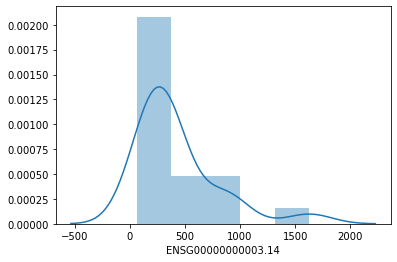

In [7]:
sns.distplot(rna.loc['ENSG00000000003.14'], bins=1+int(np.log2(len(rna.columns))))

Используем коэффециент корелляции Спирмена

In [8]:
import scipy.stats as st
import tqdm

In [9]:
data['corr'] = [st.spearmanr(rpf.iloc[x], rna.iloc[x])[0] for x in tqdm.tqdm(range(data.shape[0]))]

  0%|          | 0/16257 [00:00<?, ?it/s]/home/afattakhov/.local/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
100%|██████████| 16257/16257 [00:12<00:00, 1329.91it/s]


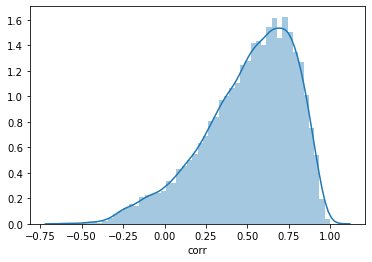

In [10]:
sns.distplot(data['corr'])

In [11]:
data[data['corr'] > 0.999999].head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,corr
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000174016.11,FAM46D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4.0,1.0
ENSG00000251258.1,RFPL4B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,35,0,27.0,1.0


FAM46D "Antibodies against the protein encoded by this gene were found only in plasma from cancer patients", найдены только в 1 семпле

RFPL4B - цинковый палец

In [12]:
data[data['corr'] < -0.55]

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,corr
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000005513.9,SOX8,0,2,8,0,0,2,14,0,0,...,2,0,0,25,2,0,0,8,4.0,-0.561372
ENSG00000089169.14,RPH3A,0,1,182,2,0,0,124,5,0,...,17,0,5,25,4,0,0,30,7.0,-0.588242
ENSG00000139890.9,REM2,0,0,7,0,0,3,8,0,0,...,3,0,0,4,1,0,0,2,3.0,-0.551351
ENSG00000179476.7,C14orf28,0,0,24,25,0,0,20,25,7,...,17,0,0,26,58,3,2,11,45.0,-0.587297
ENSG00000213658.10,LAT,2,15,2,0,0,2,0,0,2,...,3,2,6,3,0,0,3,1,1.0,-0.599996


LAT - Linker For Activation Of T Cells

RPH3A - что-то про экзоцитоз

REM2 - GTPase activity

In [13]:
data[np.abs(data['corr']) < 0.000001]

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,corr
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000100242.15,SUN2,730,738,1318,324,970,1790,1419,940,1576,...,357,411,1112,1518,939,549,778,1253,1427.0,0.0
ENSG00000139675.11,HNRNPA1L2,0,0,4,7,0,0,0,6,0,...,5,0,0,0,6,3,0,4,15.0,0.0
ENSG00000141391.13,PRELID3A,0,0,3,1,0,3,14,0,5,...,6,0,3,1,9,0,2,2,2.0,0.0
ENSG00000154479.12,CCDC173,0,1,4,1,0,0,0,1,0,...,1,0,0,1,3,2,0,1,0.0,0.0
ENSG00000165300.7,SLITRK5,0,1,18,7,0,0,7,0,0,...,2,0,0,0,0,0,1,1,0.0,0.0
ENSG00000198353.7,HOXC4,0,0,1,0,0,0,0,1,0,...,4,0,0,0,1,0,0,1,0.0,0.0
ENSG00000204172.12,AGAP9,0,0,7,5,0,0,0,0,0,...,2,0,0,8,8,0,0,6,7.0,0.0
ENSG00000255837.1,TAS2R20,0,0,1,2,0,0,0,0,0,...,15,0,0,11,13,0,0,1,14.0,0.0


HNRNPA1L2 - белок рибонуклеопротеина

In [14]:
rna.columns, rpf.columns

(Index(['LC001-normal-RNA', 'LC001-tumor-RNA', 'LC033-normal-RNA',
        'LC033-tumor-RNA', 'LC034-normal-RNA', 'LC034-tumor-RNA',
        'LC501-normal-RNA', 'LC501-tumor-RNA', 'LC502-normal-RNA',
        'LC502-tumor-RNA', 'LC505-normal-RNA', 'LC505-tumor-RNA',
        'LC506-normal-RNA', 'LC506-tumor-RNA', 'LC507-normal-RNA',
        'LC507-tumor-RNA', 'LC508-normal-RNA', 'LC508-tumor-RNA',
        'LC509-normal-RNA', 'LC509-tumor-RNA'],
       dtype='object'),
 Index(['LC001-normal-RPF', 'LC001-tumor-RPF', 'LC033-normal-RPF',
        'LC033-tumor-RPF', 'LC034-normal-RPF', 'LC034-tumor-RPF',
        'LC501-normal-RPF', 'LC501-tumor-RPF', 'LC502-normal-RPF',
        'LC502-tumor-RPF', 'LC505-normal-RPF', 'LC505-tumor-RPF',
        'LC506-normal-RPF', 'LC506-tumor-RPF', 'LC507-normal-RPF',
        'LC507-tumor-RPF', 'LC508-normal-RPF', 'LC508-tumor-RPF',
        'LC509-normal-RPF', 'LC509-tumor-RPF'],
       dtype='object'))

In [15]:
from rpy2 import robjects
import rpy2.robjects.numpy2ri
robjects.numpy2ri.activate()
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri, Formula
robjects.pandas2ri.activate()
from rpy2.robjects.packages import importr
ggplot2 = importr('ggplot2')
deseq = importr('DESeq2')
utils = importr('utils')

In [16]:
exp = data[[x for x in data.columns if 'RNA' in x]]
with localconverter(robjects.default_converter + pandas2ri.converter):
    comverted = robjects.conversion.py2rpy(pd.DataFrame({'feature':[x.split('-')[1] for x in exp.columns]}))
dataset = deseq.DESeqDataSetFromMatrix(exp.as_matrix(), 
                             comverted,
                             Formula('~feature')
                            )

<ipython-input-16-277fa6cf16a3>:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataset = deseq.DESeqDataSetFromMatrix(exp.as_matrix(),
R[write to console]: converting counts to integer mode



In [17]:
res = deseq.results(deseq.DESeq(dataset))

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 934 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [18]:
%load_ext rpy2.ipython
%Rpush res
%R print(summary(res))


out of 16256 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3533, 22%
LFC < 0 (down)     : 2538, 16%
outliers [1]       : 0, 0%
low counts [2]     : 632, 3.9%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


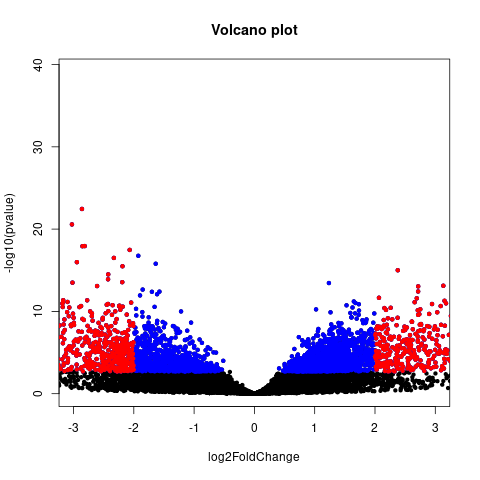

In [19]:
%%R
#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [20]:
x = %R print(which(res$padj < 0.01))
data.iloc[x]

   [1]     7     9    13    14    16    35    40    46    51    52    53    62
  [13]    67    77    78    79    85    88   107   109   126   137   139   160
  [25]   188   195   201   207   215   216   225   226   228   231   243   249
  [37]   254   260   262   269   270   279   282   286   287   290   299   300
  [49]   304   305   321   331   333   337   350   351   355   358   365   370
  [61]   373   376   377   383   386   388   389   396   400   415   417   428
  [73]   436   442   443   444   463   472   482   491   493   496   499   502
  [85]   504   506   510   513   514   521   528   531   532   537   538   552
  [97]   558   565   566   571   576   584   586   589   590   595   611   615
 [109]   616   617   619   622   627   635   637   640   644   648   656   667
 [121]   670   674   678   684   688   696   715   717   718   720   721   725
 [133]   735   747   754   758   759   760   761   774   779   781   782   787
 [145]   788   795   798   808   811   815   820   8

[1237]  6058  6060  6063  6064  6065  6069  6071  6078  6086  6095  6103  6105
[1249]  6108  6110  6112  6115  6116  6130  6138  6141  6151  6156  6165  6166
[1261]  6175  6176  6177  6190  6193  6195  6204  6214  6232  6233  6235  6236
[1273]  6237  6238  6239  6245  6250  6252  6257  6265  6266  6273  6274  6275
[1285]  6278  6283  6285  6290  6296  6297  6301  6309  6318  6322  6331  6332
[1297]  6349  6354  6359  6373  6376  6377  6379  6382  6383  6390  6398  6399
[1309]  6412  6413  6418  6424  6434  6435  6443  6444  6450  6458  6460  6470
[1321]  6486  6487  6491  6498  6500  6519  6520  6521  6523  6524  6526  6528
[1333]  6531  6532  6539  6543  6551  6567  6569  6570  6573  6575  6582  6585
[1345]  6588  6604  6607  6612  6613  6620  6624  6647  6650  6651  6652  6655
[1357]  6658  6660  6663  6664  6665  6666  6667  6668  6679  6680  6681  6683
[1369]  6688  6690  6693  6705  6707  6709  6718  6719  6721  6735  6736  6739
[1381]  6743  6749  6753  6768  6770  6772  6775  67

[2473] 12192 12194 12195 12202 12208 12214 12223 12236 12246 12248 12258 12261
[2485] 12264 12265 12267 12268 12278 12289 12298 12304 12317 12327 12338 12350
[2497] 12353 12357 12358 12360 12363 12370 12372 12379 12380 12381 12383 12387
[2509] 12400 12407 12412 12422 12424 12429 12437 12445 12462 12470 12472 12478
[2521] 12481 12483 12484 12497 12506 12510 12514 12515 12525 12537 12543 12556
[2533] 12574 12588 12599 12600 12602 12603 12607 12613 12614 12620 12627 12642
[2545] 12643 12644 12650 12665 12678 12679 12700 12702 12707 12726 12750 12751
[2557] 12758 12759 12761 12762 12763 12764 12775 12780 12781 12786 12793 12802
[2569] 12812 12814 12818

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
resultsRNA = data.iloc[x]

In [22]:
exp = data[[x for x in data.columns if 'RPF' in x]]
with localconverter(robjects.default_converter + pandas2ri.converter):
    comverted = robjects.conversion.py2rpy(pd.DataFrame({'feature':[x.split('-')[1] for x in exp.columns]}))
dataset = deseq.DESeqDataSetFromMatrix(exp.as_matrix(), 
                             comverted,
                             Formula('~feature')
                            )
res = deseq.results(deseq.DESeq(dataset))
%load_ext rpy2.ipython
%Rpush res
%R print(summary(res))

<ipython-input-22-2ec399b96fef>:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataset = deseq.DESeqDataSetFromMatrix(exp.as_matrix(),
R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 698 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython

out of 15657 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2155, 14%
LFC < 0 (down)     : 1285, 8.2%
outliers [1]       : 0, 0%
low counts [2]     : 2140, 14%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

NULL


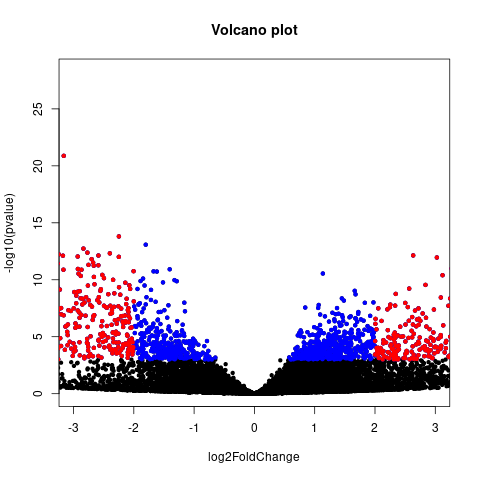

In [23]:
%%R
#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [24]:
x = %R print(which(res$padj < 0.01))

   [1]     7    21    26    40    56    66    67    77    79    90   159   199
  [13]   210   211   221   233   237   249   254   257   260   279   282   309
  [25]   314   324   332   351   365   370   388   402   404   417   420   470
  [37]   491   502   532   552   558   570   587   590   637   644   656   657
  [49]   666   678   684   688   711   717   718   721   739   759   761   765
  [61]   774   780   781   784   794   811   833   835   841   852   874   876
  [73]   916   961   985   987  1005  1019  1024  1026  1064  1075  1077  1085
  [85]  1093  1096  1102  1106  1112  1133  1136  1140  1156  1159  1172  1175
  [97]  1176  1177  1192  1196  1197  1212  1226  1227  1250  1260  1276  1282
 [109]  1296  1298  1300  1307  1326  1339  1358  1389  1390  1393  1410  1411
 [121]  1412  1420  1423  1431  1435  1436  1455  1465  1499  1507  1516  1523
 [133]  1530  1548  1549  1552  1598  1627  1629  1635  1638  1655  1663  1673
 [145]  1691  1701  1704  1713  1721  1746  1774  17

[1237] 14564 14570 14592 14594 14610 14630 14633 14683 14684 14686 14700 14716
[1249] 14722 14749 14783 14788 14792 14811 14812 14813 14830 14887 14890 14908
[1261] 14911 14917 14922 14923 14925 14928 14929 14933 14934 14940 14984 14986
[1273] 15013 15016 15024 15075 15076 15079 15100 15105 15122 15132 15145 15153
[1285] 15169 15191 15192 15196 15201 15208 15228 15247 15270 15282 15308 15333
[1297] 15392 15396 15431 15435 15449 15458 15460 15468 15484 15508 15530 15552
[1309] 15566 15572 15574 15583 15596 15618 15630 15705 15719 15788 15846 15847
[1321] 15874 15876 15915 15935 15938 15940 15950 15968 15984 15994 16011 16064
[1333] 16098 16103 16106 16109 16115 16120 16130 16133 16142 16148 16157 16158
[1345] 16159 16163 16165 16168 16171 16186 16194 16197 16204 16206 16207


In [25]:
resultsRPF = data.iloc[x]

In [26]:
print(len(set(resultsRNA.index.values)&set(resultsRPF.index.values)), 'значимы в обоих случаях')
print(len(set(resultsRNA.index.values)-set(resultsRPF.index.values)), 'значимы только в RNA')
print(len(set(resultsRPF.index.values)-set(resultsRNA.index.values)), 'значимы только в RPF')

886 значимы в обоих случаях
2280 значимы только в RNA
469 значимы только в RPF


In [27]:
resultsRNA.loc[set(resultsRNA.index.values)-set(resultsRPF.index.values)].head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,corr
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000151746.13,BICD1,0,0,31,15,0,0,18,6,14,...,21,2,87,20,152,0,9,12,30.0,0.815529
ENSG00000114439.18,BBX,70,28,203,52,122,323,131,483,147,...,677,55,201,160,288,79,129,143,411.0,0.779533
ENSG00000159339.13,PADI4,0,1,7,3,13,3,17,9,10,...,2,0,2,1,0,0,0,6,3.0,0.517122
ENSG00000087502.17,ERGIC2,52,240,127,331,43,393,86,394,169,...,467,69,570,86,740,67,158,47,259.0,0.697517
ENSG00000166483.10,WEE1,59,199,179,251,304,698,558,678,610,...,147,122,654,614,587,224,103,282,149.0,0.720572


KANSL3 - учавствует в регуляции хроматина 

ETV7 - репрессор транскрипции

FBXL20 - что-то про имунитет

In [28]:
resultsRPF.loc[set(resultsRPF.index.values)-set(resultsRNA.index.values)].head()

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,corr
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000080822.16,CLDND1,58,243,82,189,30,270,154,205,141,...,215,68,290,71,225,60,157,48,177.0,0.676194
ENSG00000101680.13,LAMA1,20,2,19,2,0,0,31,0,13,...,1,11,0,21,1,4,4,11,1.0,0.558312
ENSG00000172977.12,KAT5,66,230,61,131,86,249,58,110,174,...,121,64,257,87,160,44,46,62,95.0,0.521249
ENSG00000164104.11,HMGB2,45,149,56,128,60,293,37,98,149,...,169,68,592,53,240,57,675,36,357.0,0.822600
ENSG00000121716.18,PILRB,1,0,28,4,0,5,25,9,0,...,17,0,5,38,50,1,0,18,39.0,-0.009916


RPLP0 - рибосомный протеин

CTBS - Involved in the degradation of asparagine-linked glycoproteins

CABP1 - Prevents NMDA receptor-induced cellular degeneration

In [29]:
from BCBio import GFF

In [30]:
with open('sequence.gff3') as f:
    gff = list(GFF.parse(f))

In [31]:
genes = {1:[], -1:[]}
lens = {}
for y in gff[0].features:
    for x in y.sub_features:
        if x.type == 'CDS': # drop rRNAs
            genes[x.location.strand].append((x.location.start, x.location.end, y.qualifiers['Name'][0]))
            lens[y.qualifiers['Name'][0]] = x.location.end - x.location.start
genes[1].sort()
genes[-1].sort()

In [32]:
import bisect

def gene_by_pos(x, strand):
    found = bisect.bisect(genes[strand], (x, 999999999999999999, ""))
    if found == 0:
        return None
    l, r, gene = genes[strand][found-1]
    if r <= x:
        return None
    return l, r, gene

In [33]:
with open('02. RiboSeq_EColi_track_f.wig') as f:
    forward = [(int(x.strip().split('\t')[0]), int(x.strip().split('\t')[1])) for x in f.readlines()[1:]]
    forward.sort()
with open('02. RiboSeq_EColi_track_r.wig') as f:
    backward = [(int(x.strip().split('\t')[0]), int(x.strip().split('\t')[1])) for x in f.readlines()[1:]]
    backward.sort()

In [34]:
from collections import defaultdict
coverage = defaultdict(list)
for x in forward:
    found = gene_by_pos(x[0], 1)
    if found:
        l, r, gene = found
        coverage[gene].append((x[0] - l, x[1]))

for x in backward:
    found = gene_by_pos(x[0], -1)
    if found:
        l, r, gene = found
        coverage[gene].append((x[0] - l, x[1]))

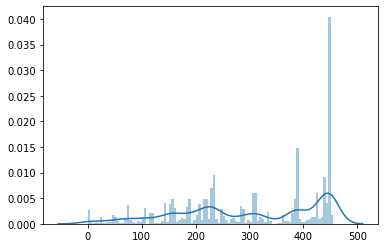

In [35]:
sns.distplot([x[0] for x in coverage['fabZ'] for y in range(x[1])], bins=100)

(0, 300)

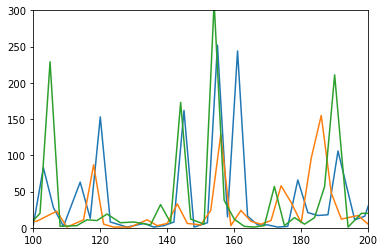

In [36]:
# plt.plot([x[0] for x in coverage['fabZ']], [x[1] for x in coverage['fabZ']])
# plt.plot([x[0]+3 for x in coverage['fabZ']], [x[1] for x in coverage['fabZ']])
plt.plot([x[0] for i, x in enumerate(coverage['fabZ']) if i % 3 == 0], 
         [x[1] for i, x in enumerate(coverage['fabZ']) if i % 3 == 0])
plt.plot([x[0] for i, x in enumerate(coverage['fabZ']) if i % 3 == 1], 
         [x[1] for i, x in enumerate(coverage['fabZ']) if i % 3 == 1])
plt.plot([x[0] for i, x in enumerate(coverage['fabZ']) if i % 3 == 2], 
         [x[1] for i, x in enumerate(coverage['fabZ']) if i % 3 == 2])
plt.xlim(100,200)
plt.ylim(0,300)

Периодичности в 3 не видно, но есть такое:

(0, 300)

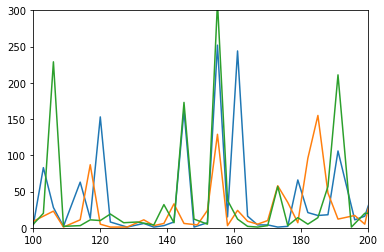

In [37]:
#свдинем
plt.plot([x[0] for i, x in enumerate(coverage['fabZ']) if i % 3 == 0], 
         [x[1] for i, x in enumerate(coverage['fabZ']) if i % 3 == 0])
plt.plot([x[0]-1 for i, x in enumerate(coverage['fabZ']) if i % 3 == 1], 
         [x[1] for i, x in enumerate(coverage['fabZ']) if i % 3 == 1])
plt.plot([x[0]+1 for i, x in enumerate(coverage['fabZ']) if i % 3 == 2], 
         [x[1] for i, x in enumerate(coverage['fabZ']) if i % 3 == 2])
plt.xlim(100,200)
plt.ylim(0,300)

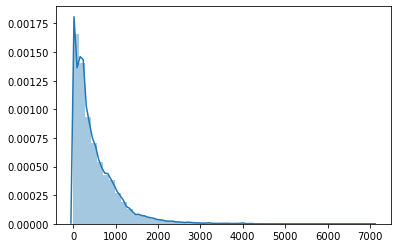

In [38]:
sns.distplot([x[0] for gene, cov in coverage.items() for x in cov for y in range(x[1])])

Похоже на экспоненциальное распределение

In [39]:
# for gene, cov in coverage.items():
#     print(gene)
#     sns.distplot([x[0] for x in cov for y in range(x[1])])
#     plt.show()

In [40]:
N = sum(x[1] for gene, cov in coverage.items() for x in cov)
RPKM = {gene: sum(x[1] for x in cov) * 10**9 / lens[gene] / N for gene, cov in coverage.items()}

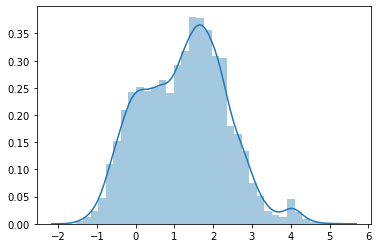

In [41]:
sns.distplot([np.log10(y) for x,y in RPKM.items()])

In [42]:
tmp = sum(rpkm*N/10**6 for gene, rpkm in RPKM.items())
TPM = {gene: rpkm*N/tmp for gene, rpkm in RPKM.items()} # т.е tpm = normalize(rpkm*N)

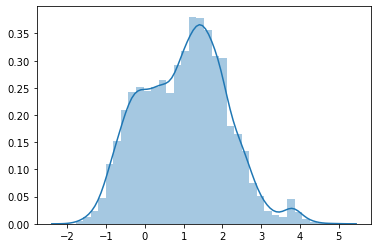

In [43]:
sns.distplot([np.log10(y) for x,y in TPM.items()])

In [44]:
atp_genes = ['atpI', 'atpB', 'atpE', 'atpF', 'atpH', 'atpA', 'atpG', 'atpD', 'atpC'] #3915553-3922440
metrics = pd.DataFrame({
    'RPKM':[RPKM[x] for x in atp_genes],
    'TPM':[TPM[x] for x in atp_genes],
}, index=pd.Index(atp_genes, name="gene"))
metrics

,RPKM,TPM
gene,,
atpI,55.879043,32.223417
atpB,1153.486346,665.173729
atpE,12010.923223,6926.263687
atpF,1091.131432,629.215912
atpH,734.757250,423.707850
atpA,1953.179218,1126.327597
atpG,599.965641,345.978420
atpD,2459.051590,1418.045842
atpC,1133.618861,653.716871


необходимо разное количество разных сабюнитов, при помощи класического RNA-Seq не получится получить разницу экспрессии, связанную с количеством задействованых рибосом